### feature 전처리 ver2
* 행정동 별 입지특성 vs 매장 반경 500m 입지특성
* 인구 특성은 동일함 (유동인구비율 = 활동인구/거주인구)

### clustering ver2
* 입지특성으로 cluster 1차 진행 후 인구 특성으로 2차 cluster 진행

In [153]:
# import module
import pandas as pd

## Load Data
# 깐부치킨 매장별 행정동 데이터 Load
store_dong = pd.read_csv("../resources/processedData/깐부치킨_매장좌표_행정동 추가.csv", encoding="utf8")

# 깐부치킨 거래데이터 Load
sales = pd.read_csv("../resources/processedData/깐부치킨_거래데이터.csv", encoding="utf8")

# 행정동별 면적 데이터 Load
dong_area = pd.read_csv("../resources/processedData/강남구_행정동별_면적.csv", encoding="utf8")

# 행정동별 인구 feature Load
people = pd.read_csv("../resources/processedData/강남구 행정동별 인구 feature.csv", encoding="utf8")

# 행정동별 토지 피복 비율 데이터 Load
dong_landscape = pd.read_csv("../resources/processedData/입지특성_행정동별 feature.csv", encoding="utf8")

# 매장별 반경 500m 토지 피복 비율 데이터 Load
store_landscape = pd.read_csv("../resources/processedData/입지특성_매장별_매장반경 500m feature.csv", encoding="utf8")

In [154]:
dong_landscape

,행정동,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율
0,개포1동,16,0,3,0.424773,0.034857,0.540370
1,개포2동,31,20,24,0.178740,0.174853,0.646407
2,개포4동,33,0,23,0.441235,0.037082,0.521683
3,논현1동,22,14,36,0.489673,0.014120,0.496207
4,논현2동,22,16,32,0.575432,0.012579,0.411990
5,대치1동,19,10,19,0.266545,0.129195,0.604261
6,대치2동,30,9,25,0.508280,0.052936,0.438784
7,대치4동,16,6,37,0.511551,0.002936,0.485514
8,도곡1동,26,8,15,0.474004,0.023388,0.502608
9,도곡2동,18,6,8,0.506491,0.058701,0.434808


In [155]:
store_dong

,매장코드,매장명,도로명주소,위도,경도,행정동
0,S24088,깐부치킨(청담자이점),서울특별시 강남구 영동대로138길 9 (청담동1층 105호),37.522861,127.056465,청담동
1,T06644,(주)깐부 청담본점,서울특별시 강남구 선릉로 760 지상2층 (청담동),37.522568,127.039578,청담동
2,S56417,깐부치킨(일원점),서울특별시 강남구 일원로9길 6 1층 (일원동),37.489289,127.081985,일원1동
3,T18671,깐부치킨(역삼디오빌점),서울특별시 강남구 언주로85길 7 1층 102호 (역삼동),37.500968,127.042636,역삼2동
4,S48814,깐부치킨(강남세브란스점),서울특별시 강남구 언주로65길 13 (역삼동 삼남빌딩 지상1층 101호 102호),37.495044,127.044869,역삼2동
5,U06529,깐부치킨(역삼초교점),서울특별시 강남구 역삼로4길 16 (역삼동지상1층113호),37.492350,127.031997,역삼1동
6,S95349,깐부치킨(역삼GS타워점),서울특별시 강남구 논현로94길 15 지상1층 (역삼동),37.502631,127.037547,역삼1동
7,T53532,깐부치킨 역삼본점,서울특별시 강남구 논현로85길 37 지상1층 (역삼동),37.498137,127.035094,역삼1동
8,S24004,깐부치킨(역삼럭키점),서울특별시 강남구 논현로63길 25 (역삼동),37.492247,127.038872,역삼1동
9,S37219,깐부치킨(강남역플래티넘점),서울특별시 강남구 강남대로78길 14 (역삼동),37.494866,127.030536,역삼1동


In [156]:
dong_landscape

,행정동,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율
0,개포1동,16,0,3,0.424773,0.034857,0.540370
1,개포2동,31,20,24,0.178740,0.174853,0.646407
2,개포4동,33,0,23,0.441235,0.037082,0.521683
3,논현1동,22,14,36,0.489673,0.014120,0.496207
4,논현2동,22,16,32,0.575432,0.012579,0.411990
5,대치1동,19,10,19,0.266545,0.129195,0.604261
6,대치2동,30,9,25,0.508280,0.052936,0.438784
7,대치4동,16,6,37,0.511551,0.002936,0.485514
8,도곡1동,26,8,15,0.474004,0.023388,0.502608
9,도곡2동,18,6,8,0.506491,0.058701,0.434808


In [157]:
# 매장별 행정동 추출
store_dong
dong_list = list(store_dong["행정동"].unique())
dong = pd.DataFrame(dong_list, columns=["행정동"])

# 매장 이름 추출
store_list = list(store_dong["매장명"])
store_list

['깐부치킨(청담자이점)',
 '(주)깐부 청담본점',
 '깐부치킨(일원점)',
 '깐부치킨(역삼디오빌점)',
 '깐부치킨(강남세브란스점)',
 '깐부치킨(역삼초교점)',
 '깐부치킨(역삼GS타워점)',
 '깐부치킨 역삼본점',
 '깐부치킨(역삼럭키점)',
 '깐부치킨(강남역플래티넘점)',
 '깐부치킨(선릉역점)',
 '깐부치킨 신사가로수점',
 '깐부치킨(신사역점)',
 '깐부치킨(압구정한강고수부지)',
 '깐부치킨(압구정현대백화점)',
 '깐부치킨(수서역점)',
 '깐부치킨(청담1호점)',
 '(주)깐부치킨(세곡점)',
 '깐부치킨(강남구청역1번출구점)',
 '깐부치킨(선정릉역점)',
 '깐부치킨(삼성1동점)',
 '깐부치킨(삼성점)',
 '깐부치킨(한티점)',
 '깐부치킨(선릉역1번출구점)',
 '깐부치킨(대치사거리점)',
 '깐부치킨(삼성역점)',
 '깐부치킨(은마아파트점)',
 '깐부치킨 대치역점',
 '깐부치킨(도산사거리점)',
 '깐부치킨(강남구청역3번출구점)',
 '깐부치킨(학동역점)',
 '깐부치킨(논현역점)',
 '깐부치킨(개포점)']

In [158]:
sales

,매장코드,매장명,영업일자,영수증번호,결제일시,테이블번호,총판매금액,소분류명,상품명,상품코드,판매수량,판매단가
0,S23991,깐부치킨(강남구청역1번출구점),20190202,6,20190202190027,포장1,2000,SIDE MENU,코울슬러,48,1,2000
1,S23991,깐부치킨(강남구청역1번출구점),20190204,14,20190204201731,포장1,19000,SIDE MENU,골뱅이,8,1,19000
2,S23991,깐부치킨(강남구청역1번출구점),20190201,2,20190201175536,포장1,19000,SIDE MENU,골뱅이,8,1,19000
3,S23991,깐부치킨(강남구청역1번출구점),20190201,7,20190201192707,포장1,11000,SIDE MENU,웨지포테이토,12,1,11000
4,S23991,깐부치킨(강남구청역1번출구점),20190203,1,20190203174823,포장1,19000,MAIN MENU,마늘간장,3496,1,19000
...,...,...,...,...,...,...,...,...,...,...,...,...
83572,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,19000,SIDE MENU,골뱅이,8,1,19000
83573,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,500,EXTRA MENU,소스추가,492,1,500
83574,U06529,깐부치킨(역삼초교점),20190226,10,20190227025816,1,500,EXTRA MENU,소스추가,492,1,500
83575,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,500,EXTRA MENU,포장무,101,1,500


In [159]:
dong_landscape

,행정동,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율
0,개포1동,16,0,3,0.424773,0.034857,0.540370
1,개포2동,31,20,24,0.178740,0.174853,0.646407
2,개포4동,33,0,23,0.441235,0.037082,0.521683
3,논현1동,22,14,36,0.489673,0.014120,0.496207
4,논현2동,22,16,32,0.575432,0.012579,0.411990
5,대치1동,19,10,19,0.266545,0.129195,0.604261
6,대치2동,30,9,25,0.508280,0.052936,0.438784
7,대치4동,16,6,37,0.511551,0.002936,0.485514
8,도곡1동,26,8,15,0.474004,0.023388,0.502608
9,도곡2동,18,6,8,0.506491,0.058701,0.434808


In [160]:
## feature 뽑기
# dong feature 뽑기
dong_feature = pd.merge(people[["행정동","인구수","유동인구비율"]], dong_landscape, on = "행정동", how = "left")
dong_feature = pd.merge(dong, dong_feature, on="행정동")

# store feature 뽑기
store_feature = pd.merge(store_dong[["매장코드","행정동"]], store_landscape, on= "매장코드", how="right")
store_feature = pd.merge(store_feature, people[["행정동","인구수","유동인구비율"]], on = "행정동", how = "left")
store_feature["인구당매출"] = 0

for store in store_list:
    idx = store_feature[store_feature["매장명"] == store].index
    sale = round(sales[sales["매장명"] == store]["총판매금액"].sum() / store_feature[store_feature["매장명"]==store]["인구수"].values[0], 3)
    store_feature.iloc[idx,-1] = sale

In [161]:
# 데이터 확인
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율
0,청담동,30014,1.42,23,11,21,0.521318,0.045404,0.433278
1,일원1동,16806,1.11,16,2,19,0.243868,0.140781,0.615351
2,역삼2동,36560,1.36,27,7,24,0.471216,0.031786,0.496998
3,역삼1동,35878,3.02,49,33,83,0.611696,0.010595,0.377709
4,신사동,17541,2.14,12,6,18,0.568069,0.083859,0.348072
5,수서동,16202,1.54,17,14,10,0.341908,0.148923,0.509169
6,세곡동,45160,0.94,66,0,30,0.282990,0.081850,0.635160
7,삼성2동,30291,1.29,24,17,30,0.449894,0.024653,0.525454
8,삼성1동,14811,3.02,30,20,21,0.644026,0.024718,0.331256
9,대치4동,20773,1.62,16,6,37,0.511551,0.002936,0.485514


In [162]:
# 데이터 확인
store_feature

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,인구수,유동인구비율,인구당매출
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.020672,0.577653,30014,1.42,2662.957
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.057290,0.779494,45160,0.94,279.949
2,S49287,대치1동,깐부치킨 대치역점,14,8,18,0.187485,0.082595,0.729920,25413,1.02,2063.117
3,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.054508,0.624547,17541,2.14,3005.986
4,T53532,역삼1동,깐부치킨 역삼본점,15,8,37,0.396986,0.601307,0.001708,35878,3.02,1130.038
5,S23991,삼성2동,깐부치킨(강남구청역1번출구점),10,10,17,0.276475,0.021761,0.701764,30291,1.29,862.467
6,T46063,논현2동,깐부치킨(강남구청역3번출구점),14,10,18,0.336520,0.030976,0.632504,21960,2.00,2113.229
7,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.029224,0.685366,36560,1.36,402.694
8,S37219,역삼1동,깐부치킨(강남역플래티넘점),32,20,29,0.934253,0.027802,0.037945,35878,3.02,1544.066
9,S41446,개포2동,깐부치킨(개포점),21,15,11,0.087827,0.161833,0.750340,14380,1.07,1377.086


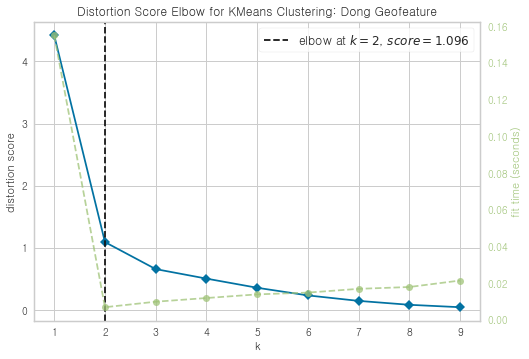

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Geofeature'}, xlabel='k', ylabel='distortion score'>

In [163]:
## 1. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_geofeature_data = dong_feature.iloc[:,6:9].values

dong_geofeature_data = MinMaxScaler().fit_transform(dong_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Geofeature")
visualizer.fit(dong_geofeature_data)
visualizer.show()

In [164]:
# 뽑힌 k로 clustering 진행 - dong- geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 2

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_geofeature_data)

# 결과 저장
dong_feature["dong_cluster_geo"] = model.fit_predict(dong_geofeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_geo"]))


print(dong_feature[dong_feature["dong_cluster_geo"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_geo"] == 1]["행정동"].values)
#print(dong_feature[dong_feature["dong_cluster_geo"] == 2]["행정동"].values)

Counter({0: 10, 1: 5})
['청담동' '역삼2동' '역삼1동' '신사동' '삼성2동' '삼성1동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']


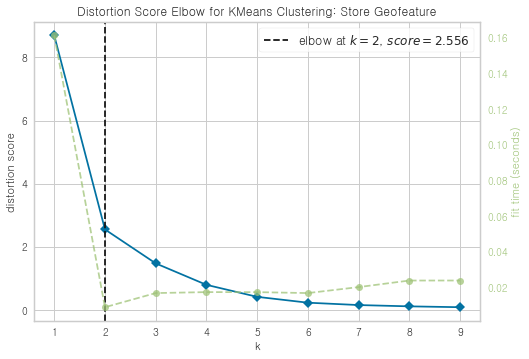

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Geofeature'}, xlabel='k', ylabel='distortion score'>

In [165]:
## 1. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-2. 매장 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_geofeature_data = store_feature.iloc[:,6:9].values

store_geofeature_data = MinMaxScaler().fit_transform(store_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Geofeature")
visualizer.fit(store_geofeature_data)
visualizer.show()

In [166]:
# 뽑힌 k로 clustering 진행 - store geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 2

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_geofeature_data)

# 결과 저장
store_feature["store_cluster_geo"] = model.fit_predict(store_geofeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_geo"]))


print(store_feature[store_feature["store_cluster_geo"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_geo"] == 1]["행정동"].values)
#print(store_feature[store_feature["store_cluster_geo"] == 2]["매장명"].values)
#print(store_feature[store_feature["store_cluster_geo"] == 3]["매장명"].values)

Counter({0: 26, 1: 7})
['청담동' '세곡동' '대치1동' '신사동' '삼성2동' '논현2동' '역삼2동' '역삼1동' '개포2동' '논현1동' '논현2동'
 '삼성1동' '대치2동' '삼성1동' '대치4동' '삼성2동' '수서동' '신사동' '신사동' '신사동' '역삼1동' '역삼1동'
 '대치2동' '일원1동' '수서동' '논현2동']
['역삼1동' '대치4동' '역삼1동' '역삼1동' '역삼2동' '청담동' '대치4동']


### 기존 feature

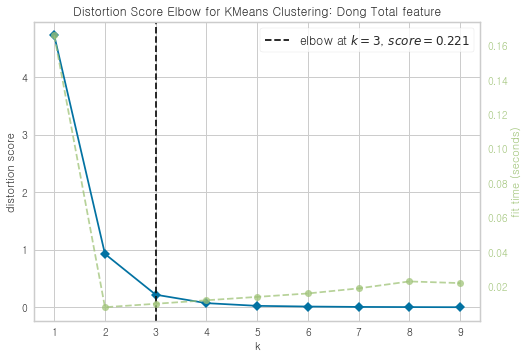

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Total feature'}, xlabel='k', ylabel='distortion score'>

In [205]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.1-1. 행정동 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_totalfeature_data = dong_feature.iloc[:,[2,9]].values

dong_totalfeature_data = MinMaxScaler().fit_transform(dong_totalfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Total feature")
visualizer.fit(dong_totalfeature_data)
visualizer.show()

In [206]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_totalfeature_data)

# 결과 저장
dong_feature["dong_cluster_total"] = model.fit_predict(dong_totalfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_total"]))


print(dong_feature[dong_feature["dong_cluster_total"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total"] == 2]["행정동"].values)

Counter({0: 8, 1: 5, 2: 2})
['청담동' '역삼2동' '신사동' '삼성2동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
['역삼1동' '삼성1동']


### 새로운 feature 

In [190]:
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,dong_cluster_geo,dong_cluster_total,dong_cluster_total_new
0,청담동,30014,1.42,23,11,21,0.521318,0.045404,0.433278,0,0,0
1,일원1동,16806,1.11,16,2,19,0.243868,0.140781,0.615351,1,1,1
2,역삼2동,36560,1.36,27,7,24,0.471216,0.031786,0.496998,0,0,0
3,역삼1동,35878,3.02,49,33,83,0.611696,0.010595,0.377709,0,2,2
4,신사동,17541,2.14,12,6,18,0.568069,0.083859,0.348072,0,1,0
5,수서동,16202,1.54,17,14,10,0.341908,0.148923,0.509169,1,1,1
6,세곡동,45160,0.94,66,0,30,0.282990,0.081850,0.635160,1,2,1
7,삼성2동,30291,1.29,24,17,30,0.449894,0.024653,0.525454,0,0,0
8,삼성1동,14811,3.02,30,20,21,0.644026,0.024718,0.331256,0,0,2
9,대치4동,20773,1.62,16,6,37,0.511551,0.002936,0.485514,0,0,0


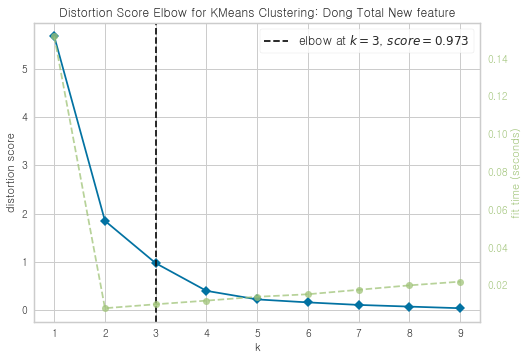

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Total New feature'}, xlabel='k', ylabel='distortion score'>

In [211]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.2-1. 행정동 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_total_newfeature_data = dong_feature.iloc[:,[2,3,9]].values

dong_total_newfeature_data = MinMaxScaler().fit_transform(dong_total_newfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Total New feature")
visualizer.fit(dong_total_newfeature_data)
visualizer.show()

In [212]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_total_newfeature_data)

# 결과 저장
dong_feature["dong_cluster_total_new"] = model.fit_predict(dong_total_newfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_total_new"]))

print("new feature")
print(dong_feature[dong_feature["dong_cluster_total_new"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total_new"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total_new"] == 2]["행정동"].values)

Counter({0: 8, 1: 5, 2: 2})
new feature
['청담동' '역삼2동' '신사동' '삼성2동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
['역삼1동' '삼성1동']


### 기존 feature

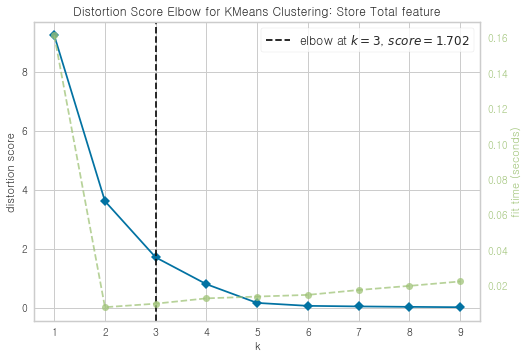

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Total feature'}, xlabel='k', ylabel='distortion score'>

In [174]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.1-2. 점포 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_totalfeature_data = store_feature.iloc[:,[10,12]].values

store_totalfeature_data = MinMaxScaler().fit_transform(store_totalfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Total feature")
visualizer.fit(store_totalfeature_data)
visualizer.show()

In [175]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - 매장 - Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_totalfeature_data)

# 결과 저장
store_feature["store_cluster_total"] = model.fit_predict(store_totalfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_total"]))

print(store_feature[store_feature["store_cluster_total"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_total"] == 1]["행정동"].values)
print(store_feature[store_feature["store_cluster_total"] == 2]["행정동"].values)

Counter({1: 21, 2: 7, 0: 5})
['역삼1동' '삼성1동' '삼성1동' '역삼1동' '역삼1동']
['청담동' '세곡동' '대치1동' '신사동' '삼성2동' '논현2동' '역삼2동' '개포2동' '논현1동' '논현2동' '대치2동'
 '대치4동' '삼성2동' '수서동' '신사동' '신사동' '신사동' '대치2동' '일원1동' '수서동' '논현2동']
['역삼1동' '대치4동' '역삼1동' '역삼1동' '역삼2동' '청담동' '대치4동']


### 새로운 feature

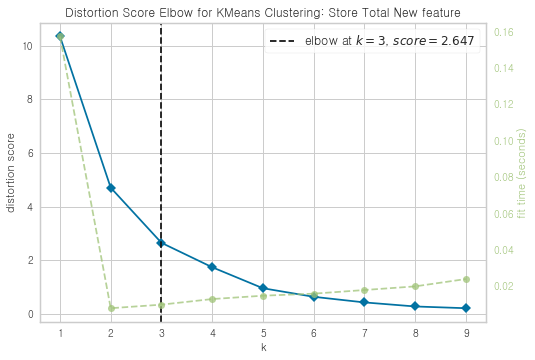

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Total New feature'}, xlabel='k', ylabel='distortion score'>

In [189]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.2-2. 점포 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_total_newfeature_data = store_feature.iloc[:,[3,10,12]].values

store_total_newfeature_data = MinMaxScaler().fit_transform(store_total_newfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Total New feature")
visualizer.fit(store_total_newfeature_data)
visualizer.show()

In [185]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_total_newfeature_data)

# 결과 저장
store_feature["store_cluster_total_new"] = model.fit_predict(store_total_newfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_total_new"]))

print("새로운 feature")
print(store_feature[store_feature["store_cluster_total_new"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_total_new"] == 1]["행정동"].values)
print(store_feature[store_feature["store_cluster_total_new"] == 2]["행정동"].values)

Counter({1: 21, 2: 7, 0: 5})
새로운 feature
['역삼1동' '삼성1동' '삼성1동' '역삼1동' '역삼1동']
['청담동' '세곡동' '대치1동' '신사동' '삼성2동' '논현2동' '역삼2동' '개포2동' '논현1동' '논현2동' '대치2동'
 '대치4동' '삼성2동' '수서동' '신사동' '신사동' '신사동' '대치2동' '일원1동' '수서동' '논현2동']
['역삼1동' '대치4동' '역삼1동' '역삼1동' '역삼2동' '청담동' '대치4동']


In [198]:
store_feature

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,인구수,유동인구비율,인구당매출,store_cluster_geo,store_cluster_total_new,store_cluster_total
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.020672,0.577653,30014,1.42,2662.957,0,1,1
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.057290,0.779494,45160,0.94,279.949,0,1,1
2,S49287,대치1동,깐부치킨 대치역점,14,8,18,0.187485,0.082595,0.729920,25413,1.02,2063.117,0,1,1
3,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.054508,0.624547,17541,2.14,3005.986,0,1,1
4,T53532,역삼1동,깐부치킨 역삼본점,15,8,37,0.396986,0.601307,0.001708,35878,3.02,1130.038,1,2,2
5,S23991,삼성2동,깐부치킨(강남구청역1번출구점),10,10,17,0.276475,0.021761,0.701764,30291,1.29,862.467,0,1,1
6,T46063,논현2동,깐부치킨(강남구청역3번출구점),14,10,18,0.336520,0.030976,0.632504,21960,2.00,2113.229,0,1,1
7,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.029224,0.685366,36560,1.36,402.694,0,1,1
8,S37219,역삼1동,깐부치킨(강남역플래티넘점),32,20,29,0.934253,0.027802,0.037945,35878,3.02,1544.066,0,0,0
9,S41446,개포2동,깐부치킨(개포점),21,15,11,0.087827,0.161833,0.750340,14380,1.07,1377.086,0,1,1


In [207]:
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,dong_cluster_geo,dong_cluster_total,dong_cluster_total_new
0,청담동,30014,1.42,23,11,21,0.521318,0.045404,0.433278,0,0,0
1,일원1동,16806,1.11,16,2,19,0.243868,0.140781,0.615351,1,1,1
2,역삼2동,36560,1.36,27,7,24,0.471216,0.031786,0.496998,0,0,0
3,역삼1동,35878,3.02,49,33,83,0.611696,0.010595,0.377709,0,2,2
4,신사동,17541,2.14,12,6,18,0.568069,0.083859,0.348072,0,0,0
5,수서동,16202,1.54,17,14,10,0.341908,0.148923,0.509169,1,1,1
6,세곡동,45160,0.94,66,0,30,0.282990,0.081850,0.635160,1,1,1
7,삼성2동,30291,1.29,24,17,30,0.449894,0.024653,0.525454,0,0,0
8,삼성1동,14811,3.02,30,20,21,0.644026,0.024718,0.331256,0,2,2
9,대치4동,20773,1.62,16,6,37,0.511551,0.002936,0.485514,0,0,0


In [17]:
store_feature

,매장명,행정동,인구당매출,유동인구비율,점포_문화·체육·휴양시설,점포_상업지역,점포_주거지역,store_cluster_geo,store_cluster_total
0,깐부치킨(청담자이점),청담동,1575.615,1.42,0.669139,0.307067,0.023793,1,2
1,(주)깐부 청담본점,청담동,2662.957,1.42,0.020672,0.401674,0.577653,0,1
2,깐부치킨(일원점),일원1동,1868.511,1.11,0.090701,0.202634,0.706666,0,1
3,깐부치킨(역삼디오빌점),역삼2동,1002.229,1.36,0.611439,0.387749,0.000812,1,2
4,깐부치킨(강남세브란스점),역삼2동,402.694,1.36,0.029224,0.285410,0.685366,0,1
5,깐부치킨(역삼초교점),역삼1동,399.284,3.02,0.008250,0.393659,0.598091,0,0
6,깐부치킨(역삼GS타워점),역삼1동,1402.823,3.02,0.612286,0.386447,0.001267,1,2
7,깐부치킨 역삼본점,역삼1동,1130.038,3.02,0.601307,0.396986,0.001708,1,2
8,깐부치킨(역삼럭키점),역삼1동,422.320,3.02,0.011219,0.306944,0.681837,0,0
9,깐부치킨(강남역플래티넘점),역삼1동,1544.066,3.02,0.027802,0.934253,0.037945,0,0


In [208]:
## plot 출력을 위한 결과 dataframe 제작
store_cluster = pd.merge(store_feature[["매장명","행정동","인구당매출","store_cluster_total", "store_cluster_total_new"]], 
                           dong_feature[["행정동","dong_cluster_total","dong_cluster_total_new"]], on="행정동", how="right")
store_cluster

,매장명,행정동,인구당매출,store_cluster_total,store_cluster_total_new,dong_cluster_total,dong_cluster_total_new
0,(주)깐부 청담본점,청담동,2662.957,1,1,0,0
1,깐부치킨(청담자이점),청담동,1575.615,2,2,0,0
2,깐부치킨(일원점),일원1동,1868.511,1,1,1,1
3,깐부치킨(강남세브란스점),역삼2동,402.694,1,1,0,0
4,깐부치킨(역삼디오빌점),역삼2동,1002.229,2,2,0,0
5,깐부치킨 역삼본점,역삼1동,1130.038,2,2,2,2
6,깐부치킨(강남역플래티넘점),역삼1동,1544.066,0,0,2,2
7,깐부치킨(선릉역점),역삼1동,1513.462,2,2,2,2
8,깐부치킨(역삼GS타워점),역삼1동,1402.823,2,2,2,2
9,깐부치킨(역삼럭키점),역삼1동,422.320,0,0,2,2


In [24]:
## 결과 Plot
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

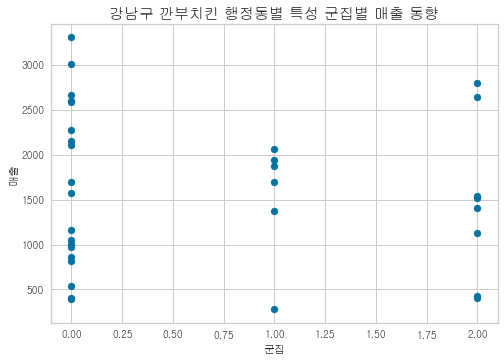

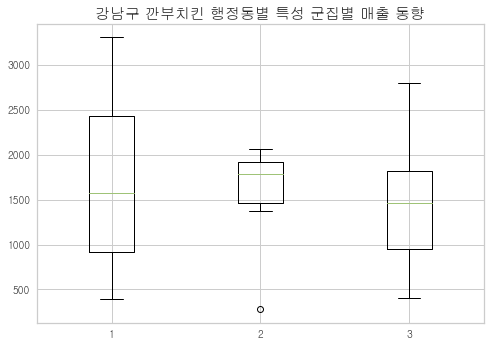

c1:  811189.6941456065 | c2:  362846.55212047225 | c3:  689808.8316392344
621281.6926351044


'\n# boxplot\nc1 = store_cluster[store_cluster["dong_cluster_total_new"] == 0]["인구당매출"].to_list()\nc2 = store_cluster[store_cluster["dong_cluster_total_new"] == 1]["인구당매출"].to_list()\nc3 = store_cluster[store_cluster["dong_cluster_total_new"] == 2]["인구당매출"].to_list()\n\nvalue = [c1, c2, c3]\nplt.boxplot(value) # vert: 가로/세로 상자그림\nplt.title(\'강남구 깐부치킨 행정동별 신특성 군집별 매출 동향\', fontsize=15)\n#plt.xticks(value, labels=["0","1","2"])\nplt.show()\n'

In [217]:
## 행정동별 feature 매출 동향
# 산점도
plt.scatter(store_cluster["dong_cluster_total"], store_cluster["인구당매출"])
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

"""
# 산점도
plt.scatter(store_cluster["dong_cluster_total_new"], store_cluster["인구당매출"], color="red")
plt.title('강남구 깐부치킨 행정동별 신특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()
"""


# boxplot
c1 = store_cluster[store_cluster["dong_cluster_total"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["dong_cluster_total"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["dong_cluster_total"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()

import numpy as np
c1_v = np.var(c1)
c2_v = np.var(c2)
c3_v = np.var(c3)
print("c1: ", c1_v, "| c2: ", c2_v, "| c3: ", c3_v)
print(np.mean([c1_v,c2_v,c3_v]))
"""
# boxplot
c1 = store_cluster[store_cluster["dong_cluster_total_new"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["dong_cluster_total_new"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["dong_cluster_total_new"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동별 신특성 군집별 매출 동향', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()
"""

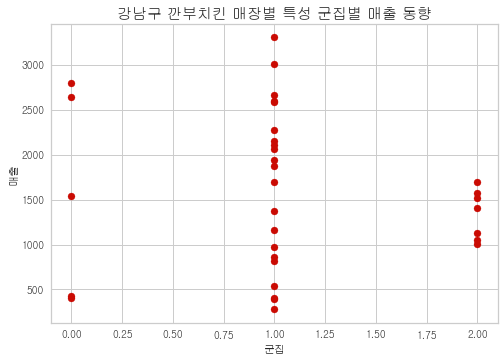

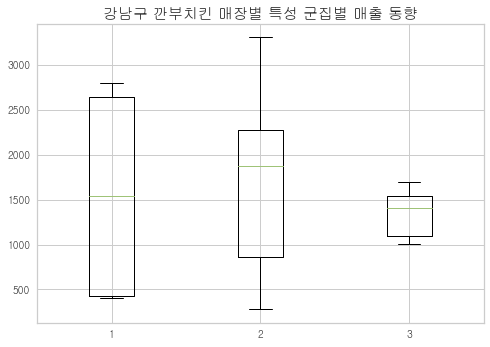

c1:  1071063.58590496 | c2:  803627.7613932833 | c3:  65189.769424204074
646627.0389074824


In [219]:
# 매장별 feature 매출 동향
plt.scatter(store_cluster["store_cluster_total"], store_cluster["인구당매출"], color="r")
plt.title('강남구 깐부치킨 매장별 특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c1 = store_cluster[store_cluster["store_cluster_total"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["store_cluster_total"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["store_cluster_total"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 매장별 특성 군집별 매출 동향', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()


c1_v = np.var(c1)
c2_v = np.var(c2)
c3_v = np.var(c3)
print("c1: ", c1_v, "| c2: ", c2_v, "| c3: ", c3_v)
print(np.mean([c1_v,c2_v,c3_v]))